# CIFAR-10 Object Classification

In [1]:
"""The CIFAR-10 dataset consists of 60,000 photos divided into 10 classes (hence the name CIFAR-10). 
Classes include common objects such as airplanes, automobiles, birds, cats and so on. 
The dataset is split in a standard way, where 50,000 images are used for training a model and the remaining 
10,000 for evaluating its performance."""

'The CIFAR-10 dataset consists of 60,000 photos divided into 10 classes (hence the name CIFAR-10). \nClasses include common objects such as airplanes, automobiles, birds, cats and so on. \nThe dataset is split in a standard way, where 50,000 images are used for training a model and the remaining \n10,000 for evaluating its performance.'

In [ ]:
%matplotlib inline

In [12]:

# Plot ad hoc CIFAR10 instances
from keras.datasets import cifar10
from matplotlib import pyplot
# load data
from pylab import rcParams
rcParams['figure.figsize'] = 8, 10

# Simple CNN model for CIFAR-10
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils


## Data Loading and Preprocessing

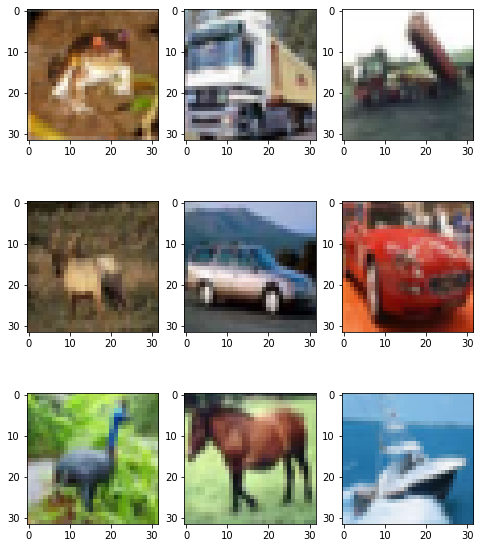

In [11]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(X_train[i])
# show the plot
pyplot.show()

In [13]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [16]:
X_test[0]

array([[[0.61960787, 0.4392157 , 0.19215687],
        [0.62352943, 0.43529412, 0.18431373],
        [0.64705884, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254903, 0.14117648],
        [0.49411765, 0.35686275, 0.14117648],
        [0.45490196, 0.33333334, 0.12941177]],

       [[0.59607846, 0.4392157 , 0.2       ],
        [0.5921569 , 0.43137255, 0.15686275],
        [0.62352943, 0.44705883, 0.1764706 ],
        ...,
        [0.53333336, 0.37254903, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509805, 0.13333334]],

       [[0.5921569 , 0.43137255, 0.18431373],
        [0.5921569 , 0.42745098, 0.12941177],
        [0.61960787, 0.43529412, 0.14117648],
        ...,
        [0.54509807, 0.38431373, 0.13333334],
        [0.50980395, 0.37254903, 0.13333334],
        [0.47058824, 0.34901962, 0.12941177]],

       ...,

       [[0.26666668, 0.4862745 , 0.69411767],
        [0.16470589, 0.39215687, 0.5803922 ],
        [0.12156863, 0

In [17]:
y_test[0]

array([3])

In [18]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [20]:
y_test.shape

(10000, 10)

## Model Architecture

In [21]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

W1015 11:42:40.674353 73708 deprecation_wrapper.py:119] From C:\Users\20131073\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1015 11:42:41.178917 73708 deprecation_wrapper.py:119] From C:\Users\20131073\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1015 11:42:41.310623 73708 deprecation_wrapper.py:119] From C:\Users\20131073\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1015 11:42:41.463528 73708 deprecation_wrapper.py:119] From C:\Users\20131073\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecate

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)              

## Model Training

In [22]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

W1015 11:43:14.800011 73708 deprecation.py:323] From C:\Users\20131073\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 244s 5ms/step - loss: 1.6949 - acc: 0.3902 - val_loss: 1.3802 - val_acc: 0.5003
Epoch 2/25
50000/50000 [==============================] - 233s 5ms/step - loss: 1.3371 - acc: 0.5186 - val_loss: 1.2078 - val_acc: 0.5638
Epoch 3/25
50000/50000 [==============================] - 222s 4ms/step - loss: 1.1699 - acc: 0.5841 - val_loss: 1.0909 - val_acc: 0.6119
Epoch 4/25
50000/50000 [==============================] - 254s 5ms/step - loss: 1.0593 - acc: 0.6220 - val_loss: 1.0434 - val_acc: 0.6308
Epoch 5/25
50000/50000 [==============================] - 260s 5ms/step - loss: 0.9592 - acc: 0.6594 - val_loss: 1.0037 - val_acc: 0.6430
Epoch 6/25
50000/50000 [==============================] - 262s 5ms/step - loss: 0.8783 - acc: 0.6901 - val_loss: 0.9434 - val_acc: 0.6691
Epoch 7/25
50000/50000 [==============================] - 254s 5ms/step - loss: 0.8054 - acc: 0.7164 - val_loss: 0.9413 - 

### Endup with 70.19% accuracy 
###  We can increase accuracy by training and changing in architecture

## Save and Load your Neural Network model

In [25]:
# serialize model to JSON
model_json = model.to_json()
with open("cifar-model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("cifar-model.h5")
print("Saved model to disk")
 

Saved model to disk


In [ ]:
# load json and create model
json_file = open('cifar-model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("cifar-model.h5")
print("Loaded model from disk")